# NBA API

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [157]:
from nba_api.stats.static import players

# get_players returns a list of dictionaries, each representing a player.
nba_players = pd.DataFrame(players.get_active_players())
print(f'Number of players fetched: {len(nba_players)}')

Number of players fetched: 519


In [158]:
nba_players

,id,full_name,first_name,last_name,is_active
0,203500,Steven Adams,Steven,Adams,True
1,1628389,Bam Adebayo,Bam,Adebayo,True
2,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
3,1629734,Kyle Alexander,Kyle,Alexander,True
4,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True
...,...,...,...,...,...
514,201152,Thaddeus Young,Thaddeus,Young,True
515,1629027,Trae Young,Trae,Young,True
516,203469,Cody Zeller,Cody,Zeller,True
517,1627790,Ante Zizic,Ante,Zizic,True


In [159]:
id = nba_players['id'][0]

In [161]:
from nba_api.stats.endpoints import playercareerstats
import time

career = list()

sample_players = nba_players.sample(20)

for player in tqdm(sample_players['id']):
    time.sleep(1.5)
    call_career = playercareerstats.PlayerCareerStats(player_id=player)
    career.append(call_career.get_data_frames()[0])
    print(player)

  5%|▌         | 1/20 [00:01<00:37,  1.99s/it]

1628989


 10%|█         | 2/20 [00:06<01:01,  3.41s/it]

1629627


 15%|█▌        | 3/20 [00:09<00:56,  3.30s/it]

1629052


 20%|██        | 4/20 [00:12<00:53,  3.33s/it]

202355


 25%|██▌       | 5/20 [00:17<00:56,  3.79s/it]

2617


 30%|███       | 6/20 [00:20<00:46,  3.34s/it]

1626192


 35%|███▌      | 7/20 [00:21<00:36,  2.85s/it]

202710


 40%|████      | 8/20 [00:23<00:31,  2.61s/it]

1627790


 45%|████▌     | 9/20 [00:27<00:30,  2.81s/it]

1629744


 50%|█████     | 10/20 [00:31<00:31,  3.17s/it]

201188


 55%|█████▌    | 11/20 [00:35<00:30,  3.43s/it]

1628396


 60%|██████    | 12/20 [00:37<00:25,  3.24s/it]

200768


 65%|██████▌   | 13/20 [00:42<00:24,  3.50s/it]

1629065


 70%|███████   | 14/20 [00:44<00:18,  3.17s/it]

204038


 75%|███████▌  | 15/20 [00:48<00:17,  3.42s/it]

202685


 80%|████████  | 16/20 [00:52<00:14,  3.58s/it]

202681


 85%|████████▌ | 17/20 [00:57<00:11,  3.88s/it]

1629058


 90%|█████████ | 18/20 [01:00<00:07,  3.85s/it]

1628401


 95%|█████████▌| 19/20 [01:02<00:03,  3.29s/it]

1629673


100%|██████████| 20/20 [01:05<00:00,  3.27s/it]

203503


In [162]:
player_info = pd.concat(career)

In [163]:
player_info

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1628989,2018-19,00,1610612737,ATL,20.0,75,59,2049.0,275,...,0.732,60,185,245,214,65,25,109,155,727
1,1628989,2019-20,00,1610612737,ATL,21.0,56,48,1760.0,252,...,0.828,35,193,228,213,51,27,87,139,684
2,1628989,2020-21,00,1610612737,ATL,22.0,69,49,2126.0,316,...,0.781,38,193,231,241,82,18,79,165,822
0,1629627,2019-20,00,1610612740,NOP,19.0,24,24,668.0,210,...,0.640,64,86,150,50,16,9,59,42,540
1,1629627,2020-21,00,1610612740,NOP,20.0,61,61,2026.0,634,...,0.698,167,274,441,226,57,39,167,135,1647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,203503,2016-17,00,1610612749,MIL,25.0,80,80,2336.0,246,...,0.810,22,226,248,96,55,14,55,125,683
4,203503,2017-18,00,1610612749,MIL,26.0,75,59,2053.0,185,...,0.792,9,132,141,98,47,28,36,115,516
5,203503,2018-19,00,1610612749,MIL,27.0,74,12,1304.0,163,...,0.881,29,128,157,68,26,18,23,90,444
6,203503,2019-20,00,1610612765,DET,28.0,59,57,1641.0,170,...,1.000,9,102,111,127,32,15,31,101,474


In [124]:
nba_players = pd.merge(player_info, nba_players, how="left", left_on="PLAYER_ID", right_on="id")

# Scrape Salaries

Adapt the years being scraped to today!

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url='https://hoopshype.com/salaries/players/'

In [79]:
r = requests.get(url, timeout=2.5)
r_html = r.text

soup = BeautifulSoup(r_html, 'html.parser')

salary_table = soup.find('table')

In [42]:
length=len(salary_table.find_all("td"))

player_names=[salary_table.find_all("td")[i].text.strip() for i in range(9,length,8)]

column1=[salary_table.find_all("td")[i].text.strip() for i in range(10,length,8)]
column2=[salary_table.find_all("td")[i].text.strip() for i in range(11,length,8)]
column3=[salary_table.find_all("td")[i].text.strip() for i in range(12,length,8)]
column4=[salary_table.find_all("td")[i].text.strip() for i in range(13,length,8)]
column5=[salary_table.find_all("td")[i].text.strip() for i in range(14,length,8)]
column6=[salary_table.find_all("td")[i].text.strip() for i in range(15,length,8)]

In [45]:
dict_df={'player_names':player_names,
        '2019/20':column1,
        '2020/21':column2,
        '2021/22':column3,
        '2022/23':column4,
        '2023/24':column5,
        '20124/25':column6}
        
df_salary=pd.DataFrame(dict_df)

In [46]:
df_salary

,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25
0,Stephen Curry,"$45,780,966","$48,070,014","$51,915,615","$55,761,217","$59,606,817",$0
1,James Harden,"$44,310,840","$47,366,760",$0,$0,$0,$0
2,John Wall,"$44,310,840","$47,366,760",$0,$0,$0,$0
3,Russell Westbrook,"$44,211,146","$47,063,478",$0,$0,$0,$0
4,LeBron James,"$41,180,544","$44,474,988",$0,$0,$0,$0
...,...,...,...,...,...,...,...
566,Cassius Winston,"$462,629","$1,576,305",$0,$0,$0,$0
567,Dakari Johnson,"$459,414",$0,$0,$0,$0,$0
568,Jontay Porter,"$300,000",$0,$0,$0,$0,$0
569,Troy Williams,"$122,741",$0,$0,$0,$0,$0


In [64]:
df_salary = df_salary.rename(columns={"20124/25": "2024/25"})

In [65]:
salary_years = ['2019/20', '2020/21', '2021/22', '2022/23', '2023/24', '2024/25']

In [66]:
df_player = pd.merge(df_salary, nba_players, left_on="player_names", right_on="full_name")

In [67]:
for col in salary_years:
    df_player[col] = df_player[col].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)

In [127]:
df_player = pd.merge(df_player, nba_players)

In [128]:
def discount_salary(df: pd.DataFrame, interest: float, year_cols: list):
    
    dcf = np.zeros((df.shape[0], len(year_cols)))
    
    for i, col in enumerate(year_cols):
        dcf[:, i] = df[col] * (1 + interest)**((-1)*i)
    
    npv = dcf.sum(axis=1)
    
    return dcf, npv

In [129]:
dcf, npv = discount_salary(df=df_player, interest=0.02, year_cols=salary_years)

In [141]:
df_player['npv_contract'] = npv

# Visualizations

In [142]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
sns.set_context("talk")

<AxesSubplot:xlabel='2019/20', ylabel='Count'>

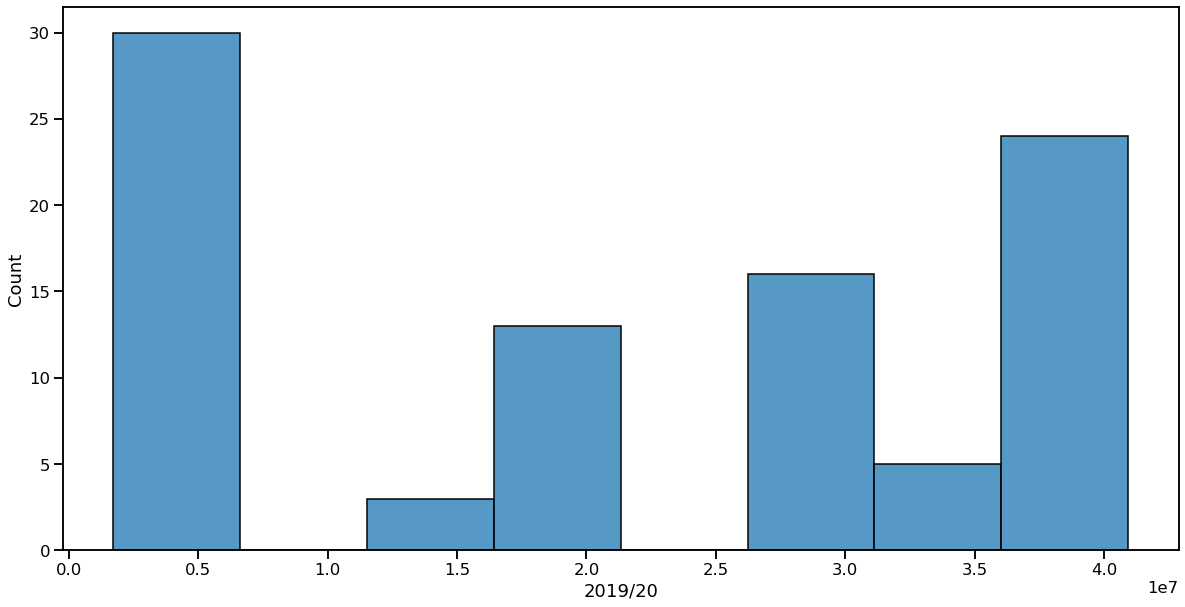

In [144]:
sns.histplot(data=df_player, x='2019/20')

In [147]:
df_player.columns

Index(['player_names', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24',
       '2024/25', 'id', 'full_name', 'first_name', 'last_name', 'is_active',
       'npv_contract', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

<AxesSubplot:xlabel='REB', ylabel='PTS'>

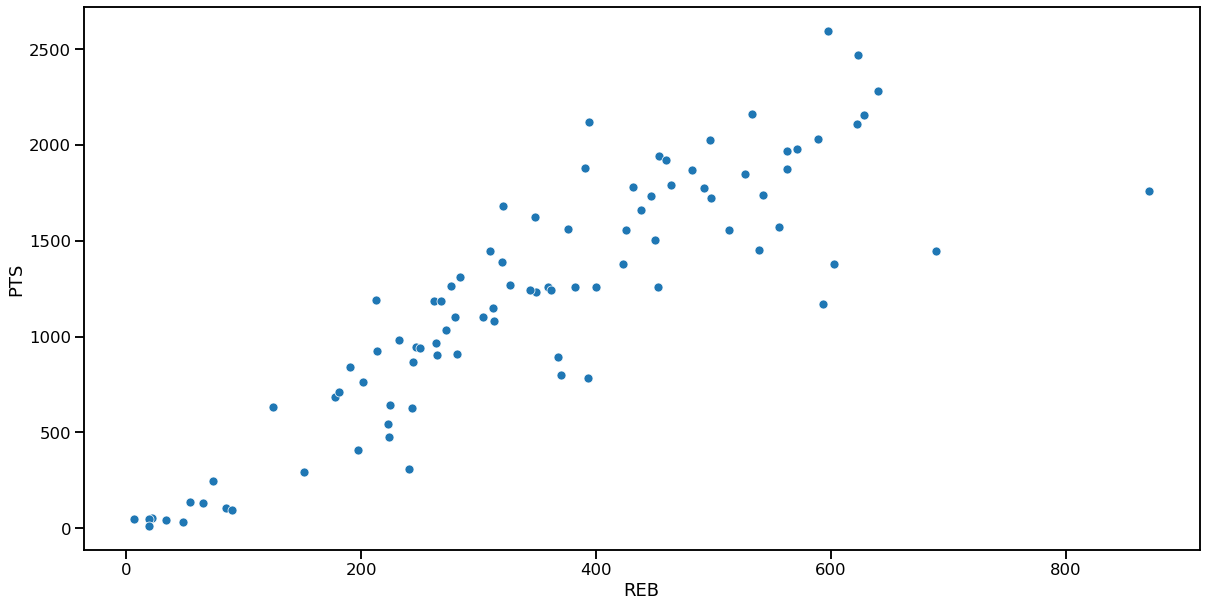

In [154]:
sns.scatterplot(data=df_player, x="REB", y="PTS")

## Specific player

In [9]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

In [1]:
# player_dict = players.get_players()
# player_dict[:5]

gamelog_bron_all = playergamelog.PlayerGameLog(player_id = '2544', season = SeasonAll.all)
df_bron_games_all = gamelog_bron_all.get_data_frames()

In [8]:
df_bron_games_all[0]

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,2544,0022001072,"MAY 16, 2021",LAL @ NOP,W,27,11,22,0.500,...,0,1,6,3,0,2,0,25,-2,1
1,22020,2544,0022001061,"MAY 15, 2021",LAL @ IND,W,28,11,22,0.500,...,4,7,8,0,0,4,2,24,7,1
2,22020,2544,0022000974,"MAY 02, 2021",LAL vs. TOR,L,28,6,11,0.545,...,7,7,6,0,0,5,2,19,-4,1
3,22020,2544,0022000956,"APR 30, 2021",LAL vs. SAC,L,32,6,12,0.500,...,7,8,7,2,1,5,1,16,5,1
4,22020,2544,0022000640,"MAR 20, 2021",LAL vs. ATL,L,11,3,6,0.500,...,1,1,4,0,0,1,0,10,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,22003,2544,0020300068,"NOV 07, 2003",CLE @ IND,L,44,8,18,0.444,...,5,5,3,0,0,7,2,23,-7,0
1306,22003,2544,0020300057,"NOV 05, 2003",CLE vs. DEN,L,41,3,11,0.273,...,9,11,7,2,3,2,1,7,-3,0
1307,22003,2544,0020300038,"NOV 01, 2003",CLE @ POR,L,39,3,12,0.250,...,4,4,6,2,0,2,3,8,-21,0
1308,22003,2544,0020300018,"OCT 30, 2003",CLE @ PHX,L,41,8,17,0.471,...,10,12,8,1,0,7,1,21,-3,0
